# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


### Merge the DataFrames

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [10]:
# Create the Suburban city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## Deliverable 1: Get a Summary DataFrame 

In [11]:
#  1. Get the total rides for each city type
# Urban total rides

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [12]:
urban_ride_count.sum()

1625

In [13]:
# Suburban total rides
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()


city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [14]:
suburban_ride_count.sum()

625

In [15]:
# Rural total rides

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [16]:
rural_ride_count.sum()

125

In [17]:
# Total Rides Count

type_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_rides_count


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [18]:
type_rides_count.sum()

2375

In [19]:
# 2. Get the total drivers for each city type
#Urban Drivers
urban_driver_count = urban_cities_df.groupby(["city"]).sum()["driver_count"]
urban_driver_count.head()

city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64

In [20]:
urban_driver_count.sum()

59602

In [21]:
# Suburban Drivers
suburban_driver_count = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
suburban_driver_count.head()

city
Barronchester    176
Bethanyland      396
Brandonfort      190
Colemanland      506
Davidfurt        391
Name: driver_count, dtype: int64

In [22]:
suburban_driver_count.sum()

8570

In [23]:
# Rural Drivers
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]
rural_driver_count.head()


city
Bradshawfurt      70
Garzaport         21
Harringtonfort    24
Jessicaport        6
Lake Jamie        24
Name: driver_count, dtype: int64

In [24]:
rural_driver_count.sum()

537

In [25]:
# Total Drivers Count

type_drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_drivers_count


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [26]:
type_drivers_count.sum()

2973

In [27]:
#  3. Get the total amount of fares for each city type
#Urban Fares

urban_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_fare.head()


city
Amandaburgh        443.55
Barajasview        557.31
Carriemouth        764.49
Christopherfurt    661.55
Deanville          491.01
Name: fare, dtype: float64

In [28]:
urban_fare.sum()

39854.38000000001

In [29]:
#Suburban Fares

suburban_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fare.head()


city
Barronchester    582.76
Bethanyland      593.21
Brandonfort      673.31
Colemanland      679.68
Davidfurt        543.93
Name: fare, dtype: float64

In [30]:
suburban_fare.sum()

19356.33

In [31]:
#Rural Fares

rural_fare = rural_cities_df.groupby(["city"]).sum()["fare"]
rural_fare.head()

city
Bradshawfurt      400.64
Garzaport          72.37
Harringtonfort    200.82
Jessicaport       216.08
Lake Jamie        206.15
Name: fare, dtype: float64

In [32]:
rural_fare.sum()

4327.93

In [33]:
# Total Fares Count

type_fares_count = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fares_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [34]:
type_fares_count.sum()

63538.64

In [35]:
# 5. Get the average fare per driver for each city type. 
# Urban Average Fare

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [36]:
urban_avg_fare.mean()

24.499121716787847

In [37]:
# SubUrban Average Fare

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [38]:
suburban_avg_fare.mean()

30.737298033475952

In [39]:
# Rural Average Fare

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [40]:
rural_avg_fare.mean()

34.63776503126503

In [41]:
# Get the average fare per ride for each city type. 
type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [42]:
type_avg_fare.mean()

30.039780102564105

In [43]:
# Get the average fare per driver for each city type. 
driver_avg_fare = type_fares_count / type_drivers_count
driver_avg_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [44]:
driver_avg_fare.mean()

37.18682137082137

In [45]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df=pd.DataFrame(
    { "Total Rides": type_rides_count,
      "Total Drivers": type_drivers_count,
      "Total Fares": type_fares_count,
      "Average Fare per Ride": type_avg_fare,
      "Average Fare per Driver": driver_avg_fare})



In [46]:
# Print Data Frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [47]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [48]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [49]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [50]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

type_dates_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_dates_count

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [51]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

type_dates_count = type_dates_count.reset_index()

type_dates_count

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [52]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_pivot_table = pd.pivot_table(type_dates_count, values='fare', index = 'date', columns ='type')

pyber_pivot_table.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [53]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

loc_pyber_pivottable = pyber_pivot_table.loc['2019-01-01':'2019-04-29']
loc_pyber_pivottable.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [54]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
loc_pyber_pivottable.index = pd.to_datetime(loc_pyber_pivottable.index)


In [55]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_pyber_pivottable.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [56]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

loc_pyber_pivottable_res=loc_pyber_pivottable.resample('W').sum()

loc_pyber_pivottable_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [58]:
#Chacking the resampled DataFrame

loc_pyber_pivottable_res.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


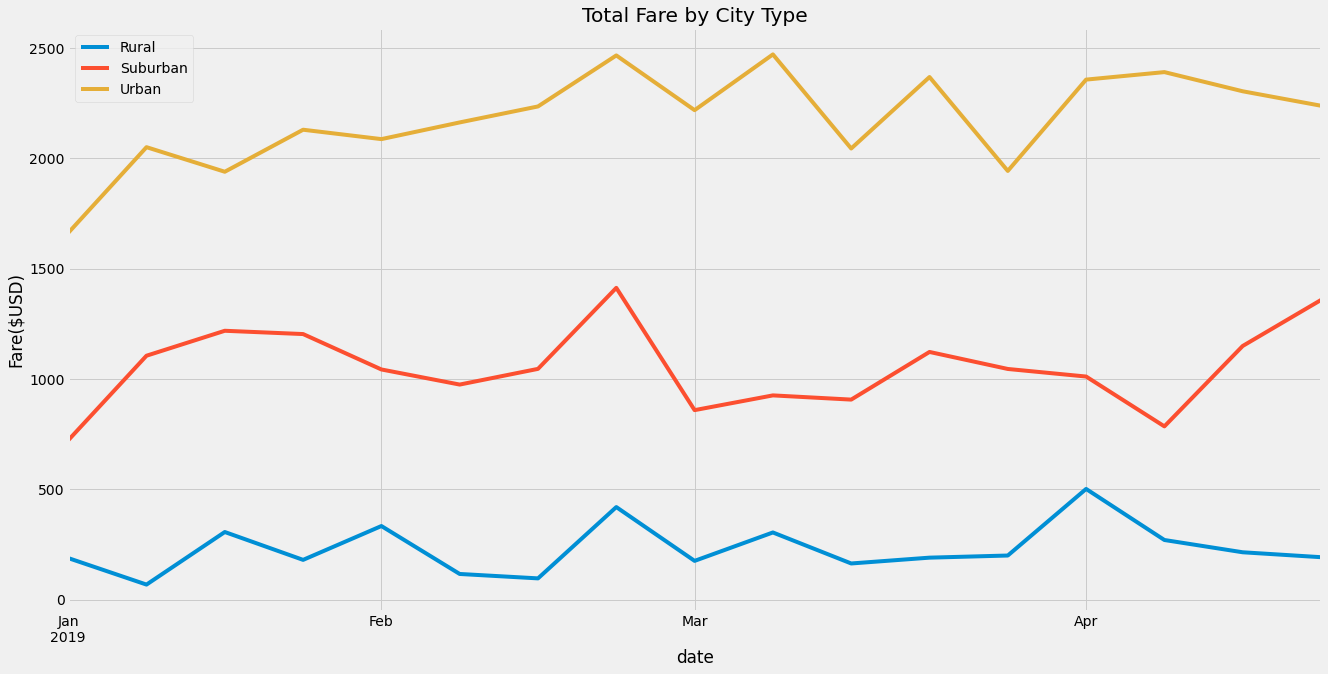

In [59]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

loc_pyber_pivottable_res.plot(figsize=(20,10))
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")
plt.legend()

In [75]:
# with %, "magic" happens behind the scenes and sets the back-end processor used for charts.
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

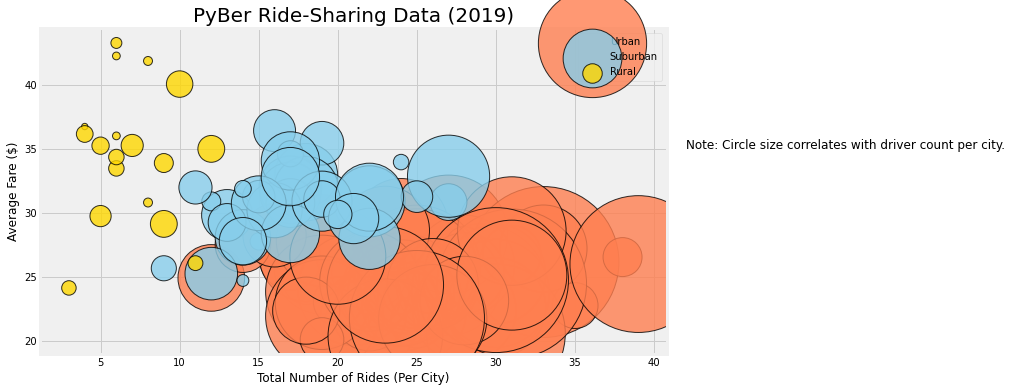

In [76]:
# Create a Scatter Plot Graph

# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.legend()
# Show the plot
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()


In [77]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [78]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [79]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

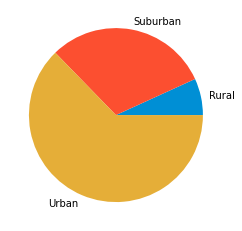

In [80]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

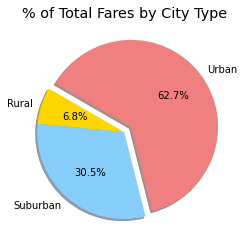

In [81]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

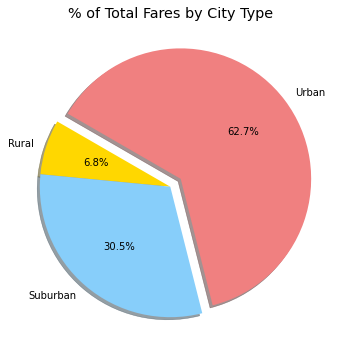

In [82]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [83]:
pyber_data_df.groupby(["type"])

In [84]:
pyber_data_df["ride_id"].count()

2375

In [85]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

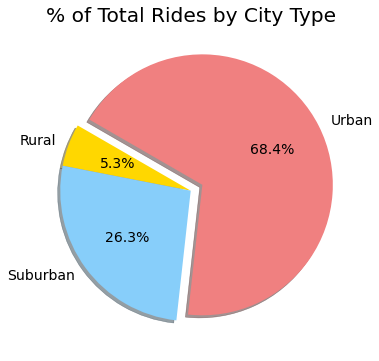

In [86]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [87]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

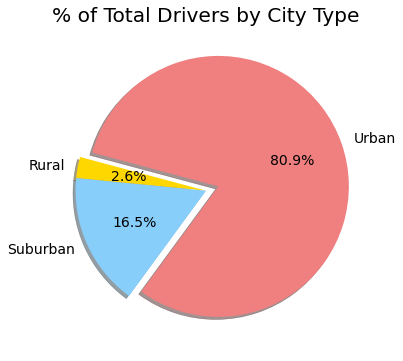

In [88]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()